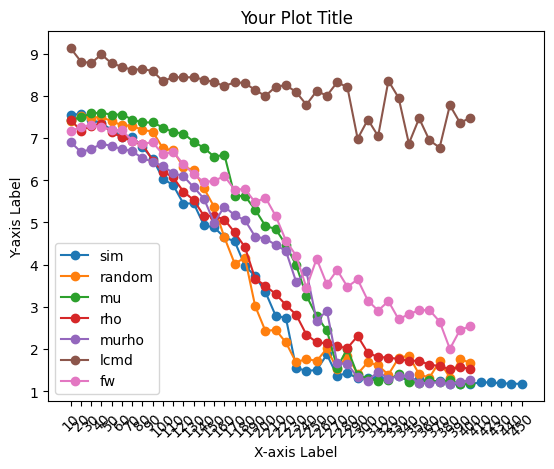

In [16]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing your CSV files
#files_path = "two_stage/*.csv"
labels = ['sim', 'random', 'mu', 'rho', 'murho', 'lcmd', 'fw']

for index, files_path in enumerate(['truesim/*.csv', "truerandom/*.csv", "truemu/*.csv", "truerho/*.csv", "truemurho/*.csv", "truelcmd/*.csv", "truefw/*.csv"]):
    # List to store dataframes for each file
    dfs = []
    
    # Read each CSV file and append it to the list
    for file in glob.glob(files_path):
        df = pd.read_csv(file, index_col=0)
        dfs.append(df.loc["PEHE"])  # Extract the row corresponding to "PEHE" for each file
    
    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs, axis=1)
    
    # Calculate the mean for each "number of samples"
    mean_values = combined_df.mean(axis=1)
    
    # Assuming you have a Pandas Series
    your_series = mean_values
    
    # Plot using .index and .values
    plt.plot(your_series.index, your_series.values, marker='o', linestyle='-', label=labels[index])
    
# Add labels and title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Your Plot Title")
plt.legend()
# Tilt x-axis labels
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
# Show the plot
plt.show()

In [8]:
from causal_bald.library.datasets import HCMNIST
import torch
from sklearn.model_selection import train_test_split

def train_test_splitting(seed, device):

    ihdp_train = HCMNIST(root='assets', split='train', mode='mu', seed=seed)
    ihdp_test = HCMNIST(root='assets', split='valid', mode='mu', seed=seed)
    
    valid_size = 0.25
    training_idx, valid_idx = train_test_split(list(range(ihdp_train.x.shape[0])),
                                                test_size=valid_size,
                                                random_state=seed)
    
    # Convert back to PyTorch tensors if needed
    combine_x_train = torch.from_numpy(ihdp_train.x[training_idx])
    combine_x_valid = torch.from_numpy(ihdp_train.x[valid_idx])
    combine_x_test = torch.from_numpy(ihdp_test.x)

    combined_y_train = torch.from_numpy(ihdp_train.y[training_idx])  # No y normalization
    combined_y_valid = torch.from_numpy(ihdp_train.y[valid_idx])
    
    tau_test = torch.from_numpy(ihdp_test.tau)

    T_train = torch.from_numpy(ihdp_train.t[training_idx])
    T_valid = torch.from_numpy(ihdp_train.t[valid_idx])
    T_test = torch.from_numpy(ihdp_test.t)

    return combine_x_train.to(device), combine_x_test.to(device), combined_y_train.to(device), combine_x_valid.to(
        device), combined_y_valid.to(device), tau_test.to(device), T_train.to(device), T_valid.to(device), T_test.to(device)

In [9]:
combine_x_train, combine_x_test, combined_y_train, combine_x_valid, combined_y_valid, tau_test, T_train, T_valid, T_test = train_test_splitting(0, device=torch.device('cuda'))

In [10]:
combine_x_train.shape

torch.Size([31500, 784])

In [11]:
combine_x_test.shape

torch.Size([18000, 784])

In [12]:
combine_x_valid.shape

torch.Size([10500, 784])